In [5]:
library(dataiku)
library(ggplot2) 
library(dplyr)
library(tidyr)
library(gridExtra)
library(ggrepel)
library("FactoMineR")
library("factoextra")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


R session is headless; GTK+ not initialized.

Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


NOTE: The default cutoff 

In [6]:
# Example: load a DSS dataset as a R dataframe
mydataset <- dkuReadDataset("Extracting_new_features")

In [7]:
summary(mydataset)

    Labele          TEXTE.resulted       num_words     num_sentences  
 Length:9900        Length:9900        Min.   : 11.0   Min.   : 1.00  
 Class :character   Class :character   1st Qu.:307.0   1st Qu.:13.00  
 Mode  :character   Mode  :character   Median :348.0   Median :17.00  
                                       Mean   :348.3   Mean   :17.06  
                                       3rd Qu.:392.0   3rd Qu.:20.00  
                                       Max.   :876.0   Max.   :64.00  
  num_semicol        num_cammas      num_points    num_two_points  
 Min.   : 0.0000   Min.   : 0.00   Min.   : 0.00   Min.   :0.0000  
 1st Qu.: 0.0000   1st Qu.: 7.00   1st Qu.:12.00   1st Qu.:0.0000  
 Median : 0.0000   Median :12.00   Median :16.00   Median :0.0000  
 Mean   : 0.1641   Mean   :12.86   Mean   :16.06   Mean   :0.2319  
 3rd Qu.: 0.0000   3rd Qu.:18.00   3rd Qu.:19.00   3rd Qu.:0.0000  
 Max.   :18.0000   Max.   :59.00   Max.   :63.00   Max.   :9.0000  
 num_exclamation   num_inte

In [8]:
sapply(mydataset, function(x) sum(is.na(x)))

Labele        TEXTE.resulted             num_words 
                    0                     0                     0 
        num_sentences           num_semicol            num_cammas 
                    0                     0                     0 
           num_points        num_two_points       num_exclamation 
                    0                     0                     0 
     num_interogation            num_cannot           num_can_not 
                    0                     0                     0 
mean_number_sentences         min_sentences         max_sentences 
                    0                     0                     0

In [9]:
colnames(mydataset)

[1] "Labele"                "TEXTE.resulted"        "num_words"            
 [4] "num_sentences"         "num_semicol"           "num_cammas"           
 [7] "num_points"            "num_two_points"        "num_exclamation"      
[10] "num_interogation"      "num_cannot"            "num_can_not"          
[13] "mean_number_sentences" "min_sentences"         "max_sentences"

In [11]:
res_PCA <- PCA(mydataset,quali.sup = c(1:2), graph = F)

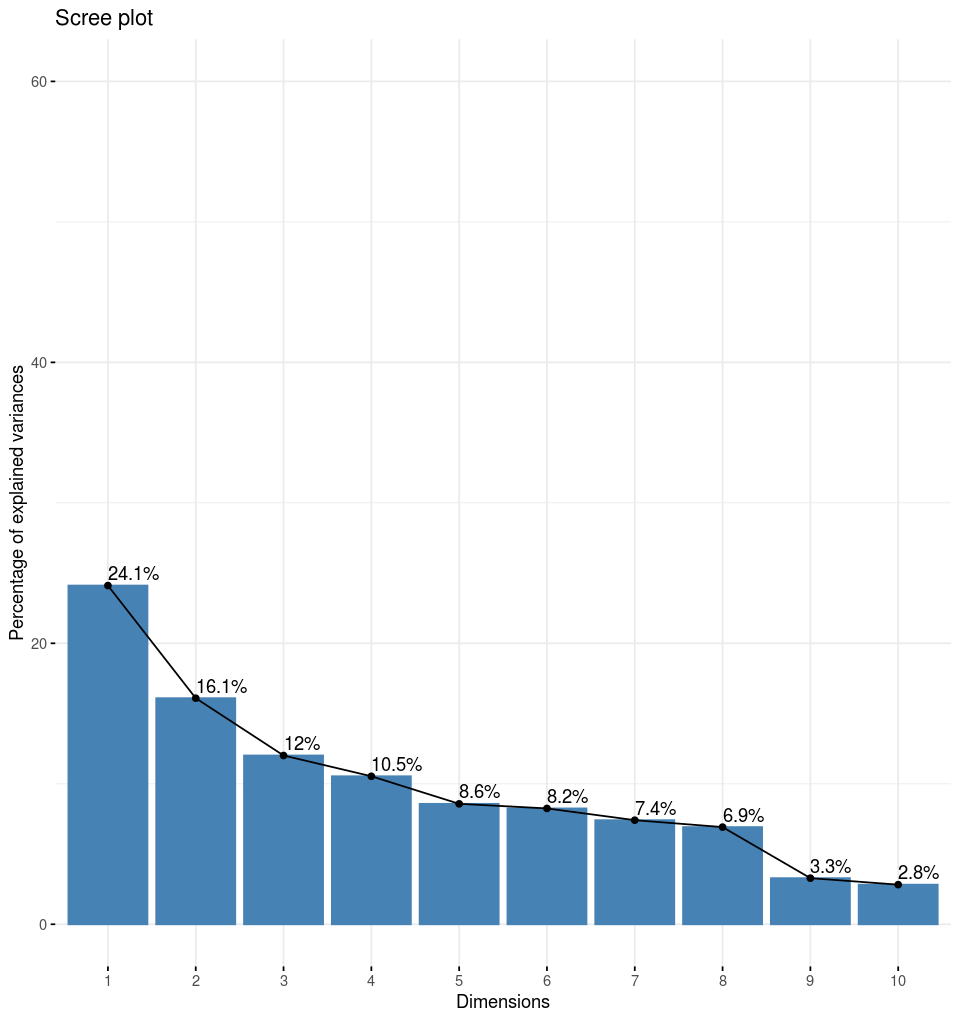

In [18]:

options(repr.plot.width=8, repr.plot.height=8.5)
fviz_screeplot(res_PCA, addlabels = TRUE, ylim = c(0, 60))

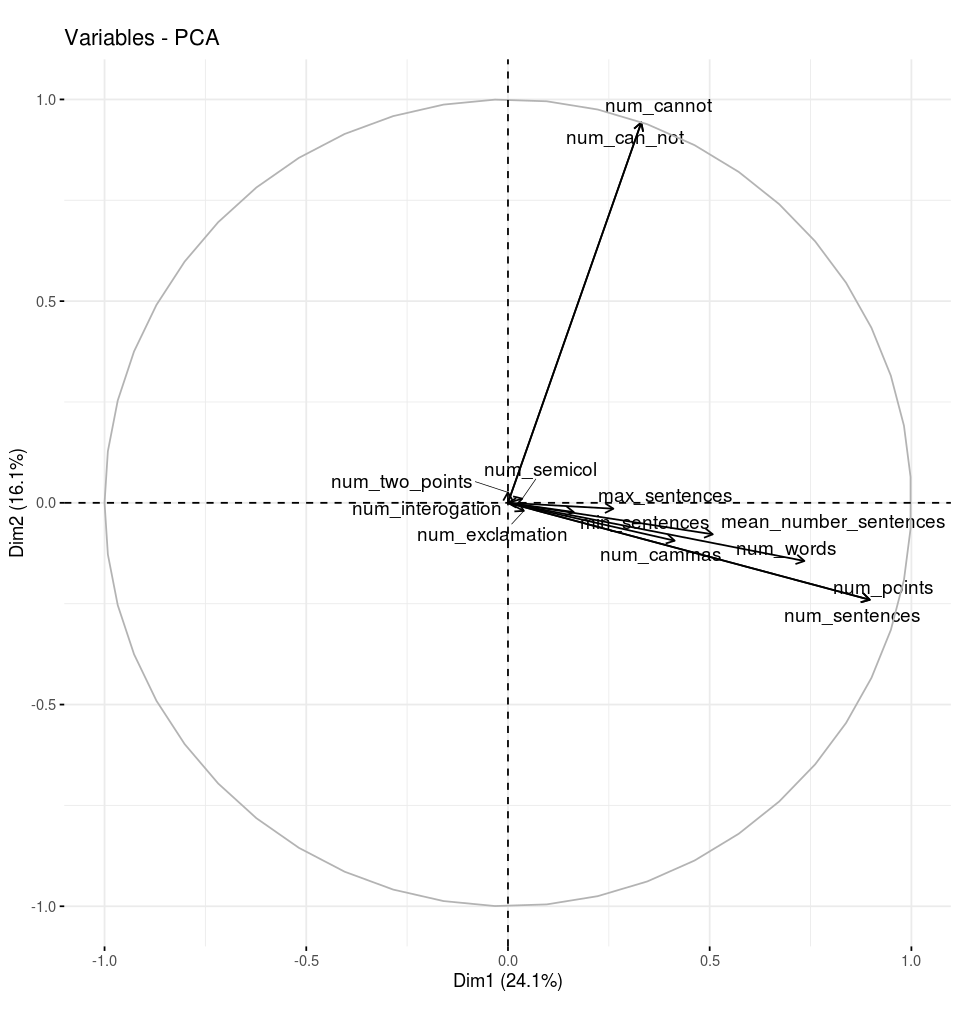

In [19]:
fviz_pca_var(res_PCA, col.var = "black", repel = T)

Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 11.”
Warning message:
“Removed 900 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


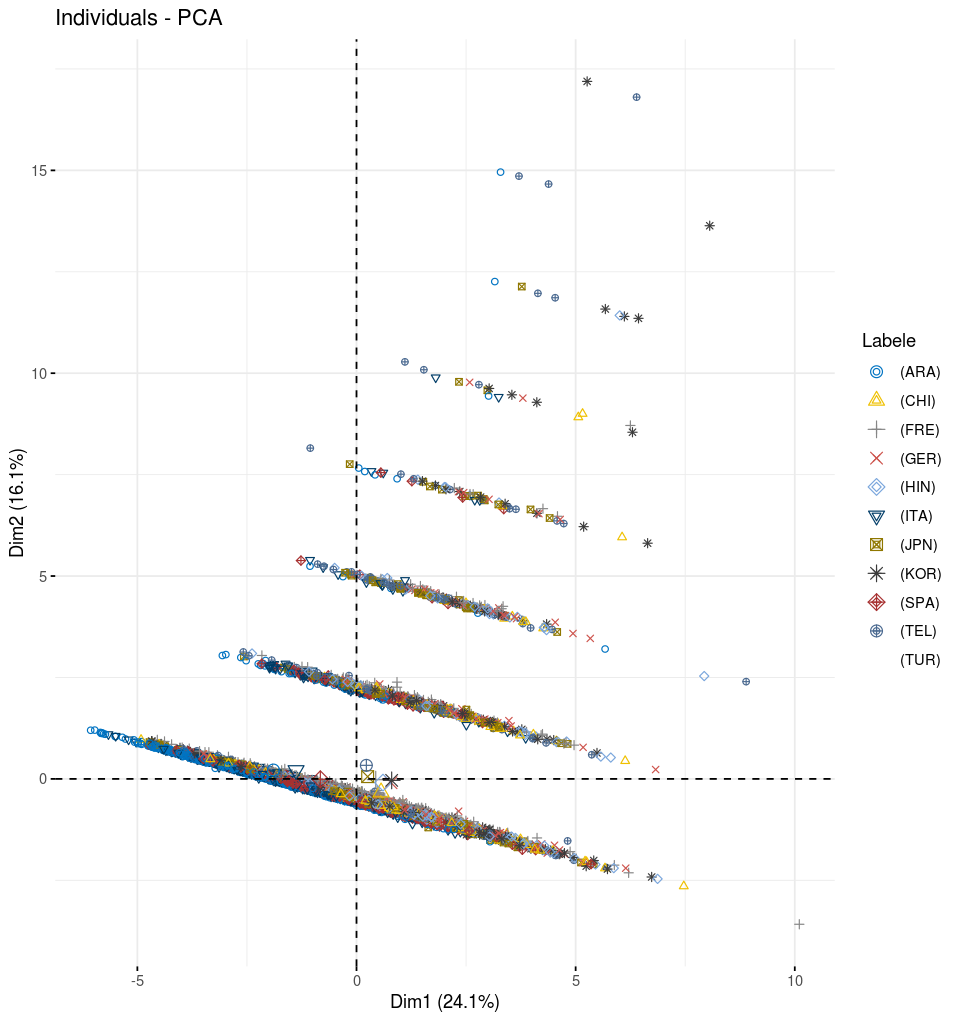

In [20]:

fviz_pca_ind(res_PCA,habillage = 1, palette = "jco",labels=FALSE) 

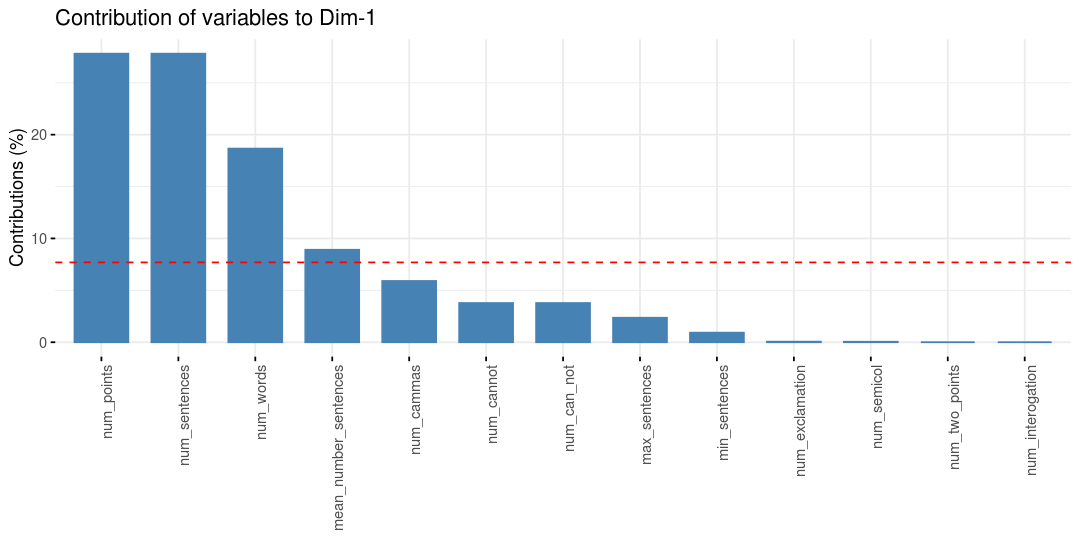

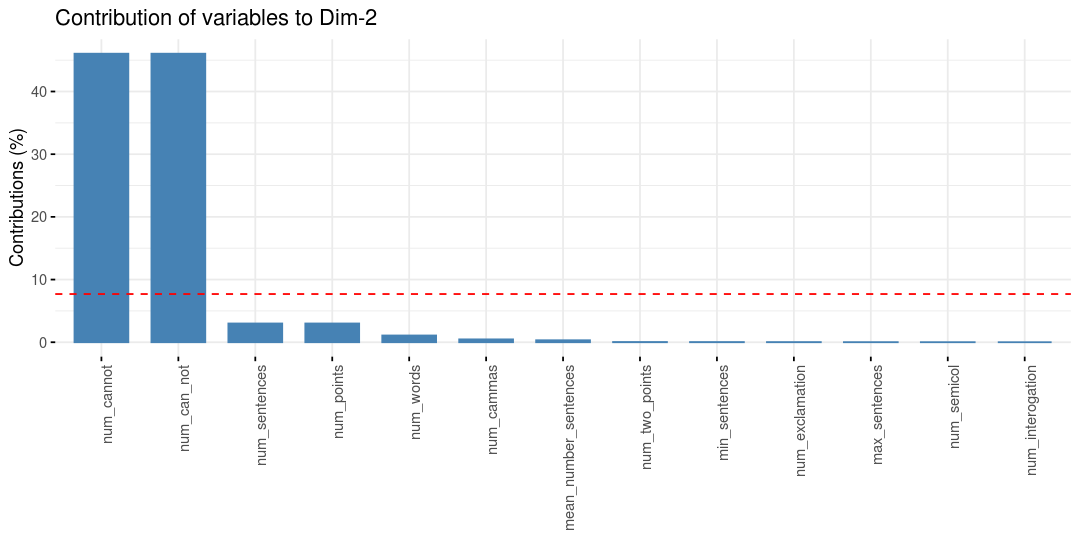

In [21]:
options(repr.plot.width=9, repr.plot.height=4.5)
# Contributions of variables to PC1
fviz_contrib(res_PCA, choice = "var", axes = 1, top = 80)+theme(axis.text.x = element_text(angle = 90, hjust = 1))
# Contributions of variables to PC2
fviz_contrib(res_PCA, choice = "var", axes = 2, top = 40)+theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [23]:
res.hcpc <- HCPC(res_PCA,nb.clust = 11)

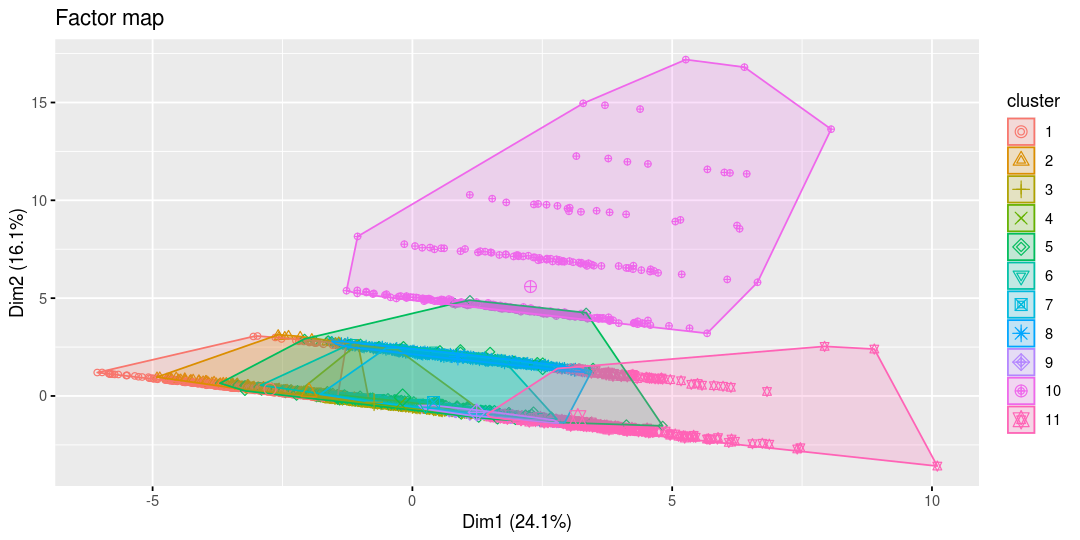

In [24]:
# Individuals facor map
fviz_cluster(res.hcpc, geom = "point", main = "Factor map")

In [25]:
res.hcpc$desc.var$quanti

$`1`
                          v.test Mean in category Overall mean sd in category
num_semicol            -2.702968       0.11411992    0.1641414      0.4554992
num_two_points         -2.950664       0.17311412    0.2319192      0.4736914
num_exclamation        -3.215113       0.07253385    0.1329293      0.3593998
num_can_not            -9.092513       0.02901354    0.1728283      0.1678444
num_cannot             -9.092513       0.02901354    0.1728283      0.1678444
min_sentences         -14.194079       1.32011605    1.8181818      0.4685894
num_cammas            -19.607620       8.45357834   12.8638384      5.6364961
max_sentences         -31.153507      34.78239845   42.0909091      0.8121655
num_words             -33.310765     265.72147002  348.2526263     69.9896081
num_points            -45.095714       8.53771760   16.0596970      3.0696349
num_sentences         -45.095714       9.53771760   17.0596970      3.0696349
mean_number_sentences -55.655887      13.66328713   17.0596970      0.7396908
                      Overall sd       p.value
num_semicol            0.6287932  6.872337e-03
num_two_points         0.6771534  3.170914e-03
num_exclamation        0.6382635  1.303932e-03
num_can_not            0.5374172  9.677625e-20
num_cannot             0.5374172  9.677625e-20
min_sentences          1.1922615  9.968742e-46
num_cammas             7.6424284  1.331166e-85
max_sentences          7.9710219 4.546536e-213
num_words             84.1831920 2.696809e-243
num_points             5.6674662  0.000000e+00
num_sentences          5.6674662  0.000000e+00
mean_number_sentences  2.0734857  0.000000e+00

$`2`
                          v.test Mean in category Overall mean sd in category
mean_number_sentences  16.437019      18.32707221   17.0596970      0.6194826
max_sentences           4.168193      43.32640950   42.0909091      6.2928283
num_semicol            -2.958890       0.09495549    0.1641414      0.4147196
num_exclamation        -4.100392       0.03560831    0.1329293      0.2588075
num_two_points         -6.205205       0.07566766    0.2319192      0.2754574
num_can_not            -7.534504       0.02225519    0.1728283      0.1475124
num_cannot             -7.534504       0.02225519    0.1728283      0.1475124
num_cammas            -21.202393       6.83827893   12.8638384      4.3465209
num_points            -31.568830       9.40652819   16.0596970      3.0686051
num_sentences         -31.568830      10.40652819   17.0596970      3.0686051
num_words             -40.641915     221.02522255  348.2526263     74.6147233
                      Overall sd       p.value
mean_number_sentences  2.0734857  1.039059e-60
max_sentences          7.9710219  3.070245e-05
num_semicol            0.6287932  3.087492e-03
num_exclamation        0.6382635  4.124512e-05
num_two_points         0.6771534  5.462571e-10
num_can_not            0.5374172  4.901936e-14
num_cannot             0.5374172  4.901936e-14
num_cammas             7.6424284 9.076217e-100
num_points             5.6674662 9.891391e-219
num_sentences          5.6674662 9.891391e-219
num_words             84.1831920  0.000000e+00

$`3`
                          v.test Mean in category Overall mean sd in category
num_cammas             12.916140     1.546539e+01   12.8638384     7.31432834
num_words               8.353339     3.667860e+02  348.2526263    49.79131817
num_exclamation        -2.889222     8.432776e-02    0.1329293     0.32290110
num_points             -6.588556     1.507558e+01   16.0596970     3.49335318
num_sentences          -6.588556     1.607558e+01   17.0596970     3.49335318
num_can_not           -12.033590     2.386635e-03    0.1728283     0.04879486
num_cannot            -12.033590     2.386635e-03    0.1728283     0.04879486
min_sentences         -16.265471     1.307080e+00    1.8181818     0.46300443
max_sentences         -32.840873     3.519173e+01   42.0909091     1.09267976
mean_number_sentences -55.132720     1.404683e+01   17.0596970     0.99313949
